# 2 Classification with KNN

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Loading the dataset and naming the columns

In [29]:
originalData = pd.read_csv("abalone.csv")
originalData.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']
pd.set_option("display.max_rows", 10)
originalData

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Describing the charectaristic of the features of the Dataset

In [30]:
originalData.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


Converting the Nomial data type (SEX) feature to numerical type

In [31]:
dummie = pd.get_dummies(originalData.Sex)
nonOrdinalData = pd.concat([originalData,dummie],axis = 'columns')
nonOrdinalData.drop("Sex", axis= 1, inplace = True)
pd.set_option("display.max_columns",None)
nonOrdinalData = nonOrdinalData[['F','I','M','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']]
nonOrdinalData

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0,1,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...,...,...
4171,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Splitting into X and Y for features and target separation

In [32]:
x = nonOrdinalData.iloc[:, :-1].values
y = nonOrdinalData.iloc[:,-1].values

In [33]:
x

array([[0.    , 0.    , 1.    , ..., 0.0995, 0.0485, 0.07  ],
       [1.    , 0.    , 0.    , ..., 0.2565, 0.1415, 0.21  ],
       [0.    , 0.    , 1.    , ..., 0.2155, 0.114 , 0.155 ],
       ...,
       [0.    , 0.    , 1.    , ..., 0.5255, 0.2875, 0.308 ],
       [1.    , 0.    , 0.    , ..., 0.531 , 0.261 , 0.296 ],
       [0.    , 0.    , 1.    , ..., 0.9455, 0.3765, 0.495 ]])

In [34]:
y

array([ 7,  9, 10, ...,  9, 10, 12], dtype=int64)

Splitting into training set(80%) and testing set(20%)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=122)

Feature Scaling as per data cleaning step


Standardizing the data featues

In [36]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# x_train = (x_train - x_train.mean())/x_train.std()
# x_test = (x_test - x_test.mean())/x_test.std()
# x_train

In [37]:
x_test

,0,1,2,3,4,5,6,7,8,9
0,1.500730,-0.687977,-0.768424,1.177970,0.933822,0.834249,1.876975,1.073658,1.127693,3.503890
1,-0.666342,-0.687977,1.301364,0.468155,0.477952,-0.106742,-0.064640,0.211883,-0.119407,-0.249342
2,-0.666342,1.453536,-0.768424,-0.325167,-0.535095,-0.459613,-0.653382,-0.672570,-0.533573,-0.746411
3,-0.666342,-0.687977,1.301364,1.303232,1.339041,1.657615,1.972364,2.159948,2.098682,1.429166
4,-0.666342,-0.687977,1.301364,0.635171,0.477952,0.363753,0.242038,0.354756,0.262546,0.082037
...,...,...,...,...,...,...,...,...,...,...
831,-0.666342,1.453536,-0.768424,-0.074644,-0.585747,-0.812485,-0.723128,-0.658963,-0.524369,-0.800441
832,1.500730,-0.687977,-0.768424,-0.408675,-0.281833,0.010882,-0.283111,-0.189523,-0.446138,-0.310575
833,-0.666342,-0.687977,1.301364,0.969201,1.035127,0.716625,1.116945,0.946660,1.169110,1.227457
834,1.500730,-0.687977,-0.768424,0.760432,1.136431,0.246130,1.059507,1.227870,0.741138,0.766408


knn with Default parameters

In [38]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
final = accuracy_score(y_test, y_pred)*100
print("Accuracy for default parameters =", final,"%")

Accuracy for default parameters = 23.56459330143541 %


KNN across all possible k values under 200

In [39]:
accuracy_values = []
k_values = [i for i in range(1,200)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    temp = knn.predict(x_test)
    accuracy_values.append(accuracy_score(y_test, temp)*100)

Plotting accuracy vs k curve

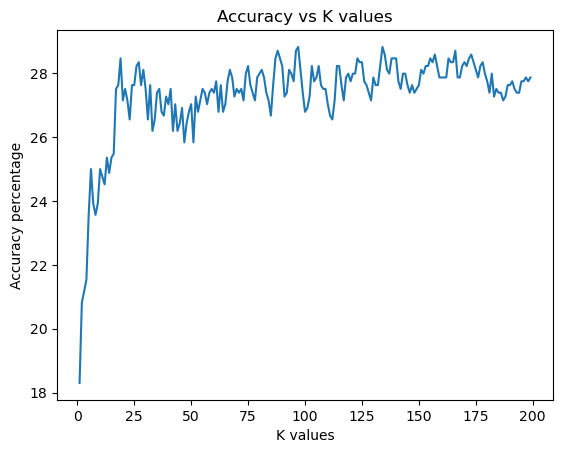

In [40]:
plt.plot(k_values, accuracy_values)
plt.xlabel("K values")
plt.ylabel("Accuracy percentage")
plt.title("Accuracy vs K values")
plt.show()

In [41]:
optimal_k = k_values[accuracy_values.index(max(accuracy_values))]
print("K value for the maximum accuracy is", optimal_k)
print("The accuracy =", max(accuracy_values),"%")

K value for the maximum accuracy is 97
The accuracy = 28.827751196172247 %


# 5 fold CrossValidation for parameter tuning

In [42]:
k_values = [n for n in range(1,200)]
accuracy = []
variance = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring = 'accuracy')
    accuracy.append(scores.mean()*100)
    variance.append(scores.std())
print(accuracy)

[19.910179640718564, 20.41916167664671, 20.508982035928142, 20.23952095808383, 20.928143712574848, 21.736526946107784, 22.27544910179641, 22.12574850299401, 22.48502994011976, 23.263473053892216, 23.682634730538922, 24.31137724550898, 23.922155688622755, 24.88023952095808, 24.011976047904188, 25.419161676646713, 24.67065868263473, 24.97005988023952, 25.17964071856288, 25.05988023952096, 24.91017964071856, 25.329341317365273, 25.089820359281433, 25.419161676646706, 25.508982035928142, 24.64071856287425, 25.05988023952096, 25.35928143712575, 24.910179640718564, 24.880239520958085, 25.05988023952096, 25.02994011976048, 25.329341317365266, 25.089820359281433, 25.05988023952096, 25.149700598802394, 25.44910179640719, 25.7185628742515, 25.5688622754491, 25.508982035928145, 25.149700598802394, 25.419161676646706, 25.389221556886234, 25.479041916167667, 25.089820359281433, 25.239520958083826, 25.329341317365266, 25.179640718562872, 25.089820359281433, 25.05988023952096, 25.359281437125752, 25.

Plotting  Mean Validation Accuracy vs K curve

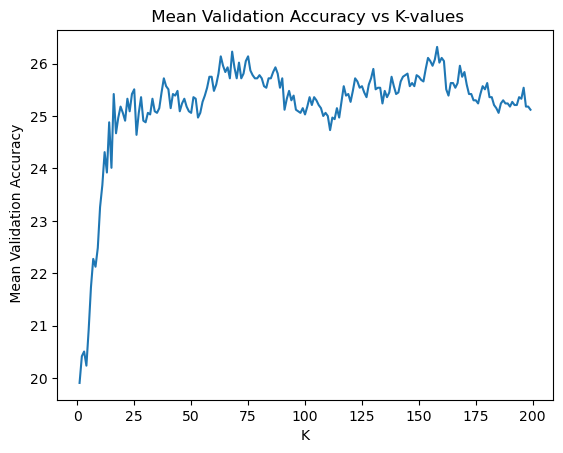

In [43]:
plt.plot(k_values, accuracy)
plt.xlabel('K')
plt.ylabel(' Mean Validation Accuracy')
plt.title(' Mean Validation Accuracy vs K-values')
plt.show()

From the plots, best K value =158, fit model on training set and predict on test set

In [44]:
tuned_k = accuracy.index(max(accuracy))+1
print("The promising value of K =",tuned_k)

The promising value of K = 158


Plotting Variance vs K curve

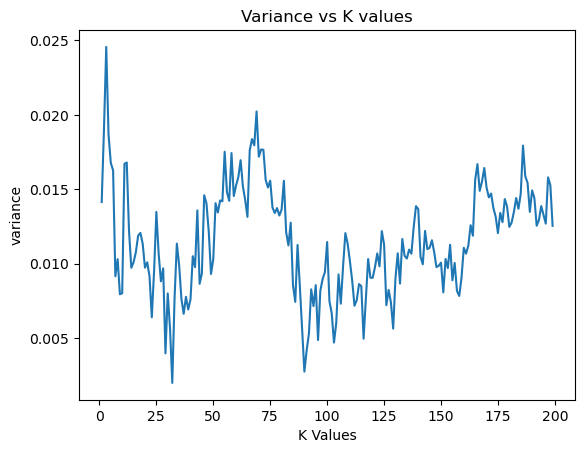

In [45]:
plt.plot(k_values, variance)
plt.xlabel('K Values')
plt.ylabel('variance')
plt.title("Variance vs K values")
plt.show()

Retraining KNN using promising value of K

In [46]:
final_knn = KNeighborsClassifier(n_neighbors = tuned_k)
final_knn.fit(x_train,y_train)
y_pred = final_knn.predict(x_test)
print("Final Accuracy =", accuracy_score(y_test, y_pred)*100, "%")

Final Accuracy = 28.22966507177033 %


# Improving on KNN:

Weighted KNN

p=1 for Manhattan

p=2 for Euclidian

Distance-Manhattan

In [54]:
knn = KNeighborsClassifier(n_neighbors = tuned_k, weights = 'distance', p=1, metric = 'minkowski')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(pred, y_test)*100
print("Accuracy =", accuracy, "%")

Accuracy = 28.708133971291865 %


Distance-Euclidean

In [55]:
knn = KNeighborsClassifier(n_neighbors = tuned_k, weights = 'distance', p=2, metric = 'minkowski')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(pred, y_test)*100
print("Accuracy =", accuracy, "%")

Accuracy = 28.11004784688995 %


Experimenting with algorithm selection parameter with best k,weights and p selected

Ball Tree

In [56]:
knn = KNeighborsClassifier(n_neighbors = tuned_k, weights = 'distance', p=1, algorithm='ball_tree')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(pred, y_test)*100
print("Accuracy =", accuracy, "%")

Accuracy = 28.708133971291865 %


KD Tree

In [57]:
knn = KNeighborsClassifier(n_neighbors = tuned_k, weights = 'distance', p=1, metric = 'minkowski', algorithm='kd_tree')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(pred, y_test)*100
print("Accuracy =", accuracy, "%")

Accuracy = 28.708133971291865 %


Brute

In [58]:
knn = KNeighborsClassifier(n_neighbors = tuned_k, weights = 'distance', p=1, metric = 'minkowski', algorithm='brute')
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(pred, y_test)*100
print("Accuracy =", accuracy, "%")

Accuracy = 28.708133971291865 %
